# Business Case: Aerofit

## Contents
[1. About](#about)

[2. Business Problem](#business-problem)

[3. Importing libraries and Loading Data](#importing-libraries-and-loading-data)

[4. Observations](#observations)

[5. Univariate Analysis](#univariate-analysis)

[6. Bivariate Analysis](#bivariate-analysis)

## About
- Aerofit is a leading company in the field of fitness equipment.
- It's Product range includes machines such as treadmills, exercise bikes, gym equipment and fitness accessories.

## Business Problem

### Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation to the new customers.

#### Goals
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.



## Importing libraries and Loading Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# loading the dataset.
df = pd.read_csv("aerofit_treadmill.csv")

## Observations

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.shape


(180, 9)

In [5]:
df.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### There are 9 features and 180 data points.

- These 9 features are:
    - Product
    - Age
    - Gender
    - Education
    - MaritalStatus
    - Usage
    - Fitness
    - Income
    - Miles

- Apart from Gender and MaritalStatus all other data is in Integer format.
- Gender and MaritalStatus are in Enum datatype G -> Male/Female, M.S -> Single/Partnered

#### Max,Min and Mean of some useful features.

**Age** -> min: 18.0, max: 50.0, mean: 28.7

**Usage** -> min: 2.0, max: 7.0, mean: 3.5

**Income** -> min: 29562, max: 104581, mean: 53720

**Miles** -> min: 21.0, max: 360.0, mean: 103.19

**Education** -> min: 12.0, max: 21.0, mean: 15.6
**Fitness** -> min: 1.0, max: 5.0, mean: 3.3

## Univariate Analysis.

### Sales Analysis

         Percentage
Product            
KP281     44.444444
KP481     33.333333
KP781     22.222222


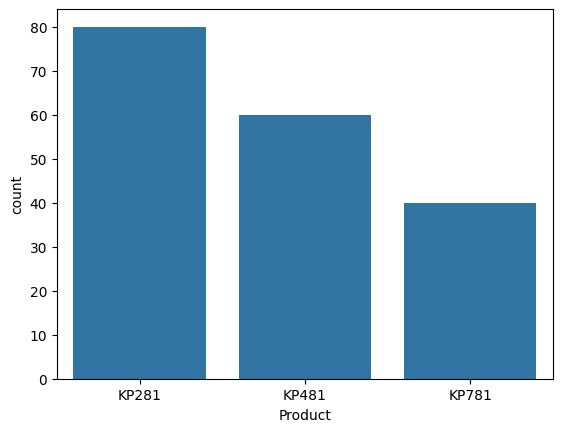

In [6]:
sns.countplot(data=df, x="Product")
crosstab = pd.crosstab(index=df["Product"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

#### Product sales distribution.

- The above plot shows that the maximun no of sales was accieved for product KP281 with a 44% of sales.
- It was followed by KP481 with a 33% of sales
- And finally KP781 was with a 22% of sales.

**This concludes that more people bought KP281 which was the entry level product followed by KP481 and KP781 which are targetted at more advanced users.**

### Gender and MaritalStatus Analysis

        Percentage
Gender            
Female   42.222222
Male     57.777778


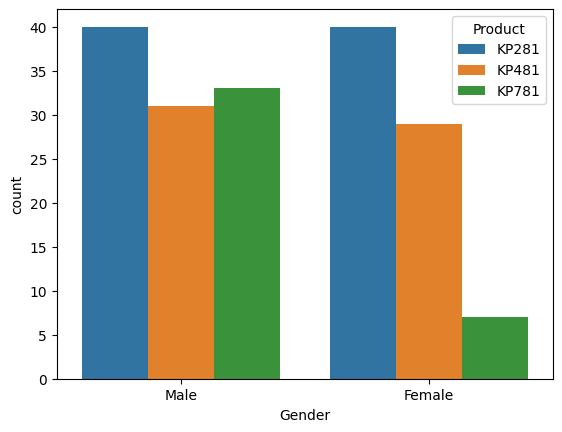

In [7]:
sns.countplot(data=df, x="Gender", hue="Product")

crosstab = pd.crosstab(index=df["Gender"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

#### Gender distribution.

- This shows that for beginner level treadmill(KP281) the number of both male and female buyers are equal.
- Although the numbers are little less from the KP281 for intermediate level treadmill(KP481) the number of both male and female buyers are equal.
- For the advanced level treadmill(KP781) we can see that the trend is not same as before as the numbers of male buyers has increasaed while the number of female buyers has dropped significantly.

**This shows that more males are buying treadmills with around 57.7% of all the users being male.Whereas female buyers are also near around the with around 42.2 % users.**

               Percentage
MaritalStatus            
Partnered       59.444444
Single          40.555556


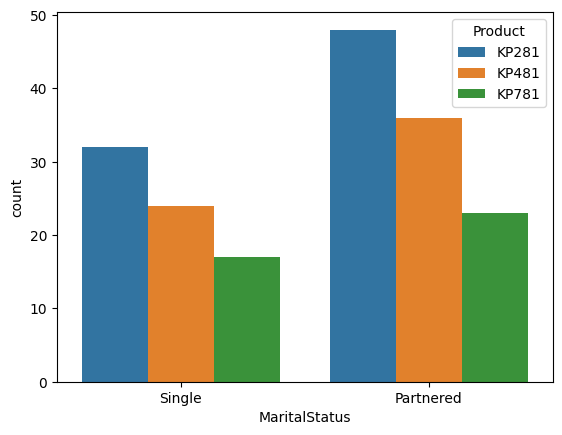

In [8]:
sns.countplot(data=df, x="MaritalStatus", hue="Product")

crosstab = pd.crosstab(index=df["MaritalStatus"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

#### MaritalStatus distribution

- For beginner level treadmill(KP281) more partnered buyers are there with a significant difference.
- For intermediate level treadmill(KP481) also partnered buyers are more but the difference is not much.
- For advanced level treadmill(KP781) the number of both Single and Partnered users are almost equal with partnered users being just a little bit more than single.

**This shows that there are around 59.4% Partnered buyers and 40.5% Single buyers.**

### Age Analysis

<Axes: xlabel='Age', ylabel='Count'>

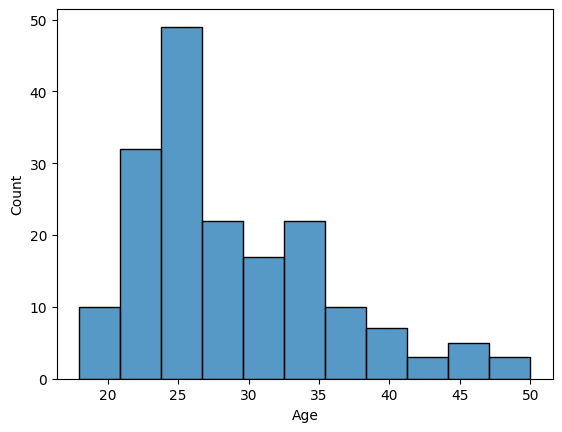

In [64]:
sns.histplot(data=df, x="Age")

<Axes: xlabel='Age'>

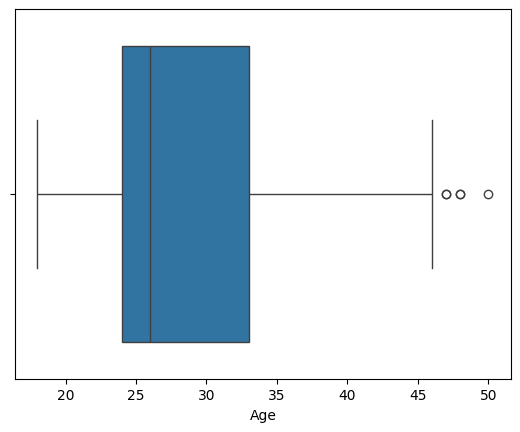

In [41]:
sns.boxplot(data=df, x="Age")

#### Age distribution of the customers

- More users are in the age group of 18-28 which tells that young people tend to be more health conscious.
- There is a significant drop in sales when we go to the 28-38 age group which tells that people being more busy in this age group are less likely to be more health conscious.
- This trend continuous for the age group of 38-48.
- There are very less members in the age group of 48-60 which tells us that even in this age group some people are there who are health conscious.
- The median age of majority buyers is 26.

**This concludes that young users are more health conscious and hence are the majority of the customers and the falling trend shows that with increase in age customers are less health conscious maybe due to more busy lifestyle and workload.**

**Outliers**

- There are 3 outliers Present.

### Income Analysis.

<Axes: xlabel='Income', ylabel='Count'>

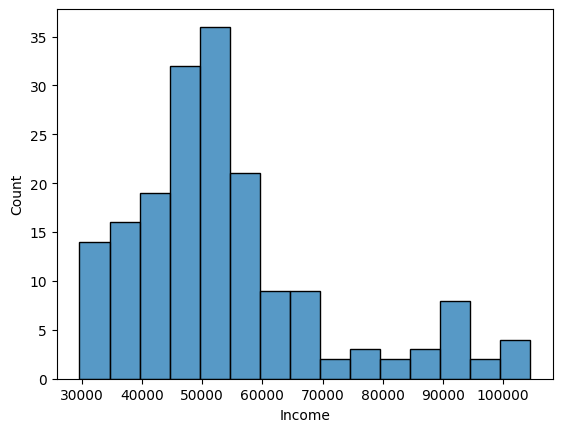

In [11]:
sns.histplot(data=df, x="Income")

In [12]:
crosstab = pd.crosstab(index=df[df["Income"]> df["Income"].mean() ]["Product"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent)

         Percentage
Product            
KP281     28.571429
KP481     20.634921
KP781     50.793651


<Axes: xlabel='Income'>

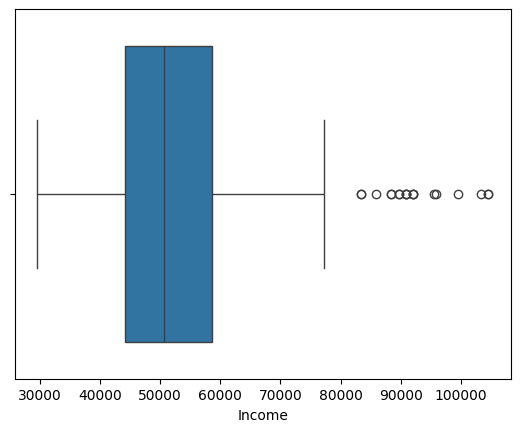

In [40]:
sns.boxplot(data=df, x="Income")

#### Income distribution.

- The above plots shows us that majority of buyers have an income of between 40000 and 60000.

- We can also observe that quantity of people with low income are more, we can draw from this that high income people tend to do more work hence are relatively busier than others and do not have time to invest on fitness,

- The median income of majority buyers is 50000.

- The Presence of these many outliers also tells that there are still many people with high income who spend on health and fitness.

**This concludes that although people with high income are spending a lot on the advanced level treadmill the number of such people is less as compared to people who are willing to buy the intermediate and beginner level treadmills and hence the revenue proportion is almost equally distributed between these**

**Outliers**

- There are a lot of outliers.

### Education Analysis.

<Axes: xlabel='Education', ylabel='count'>

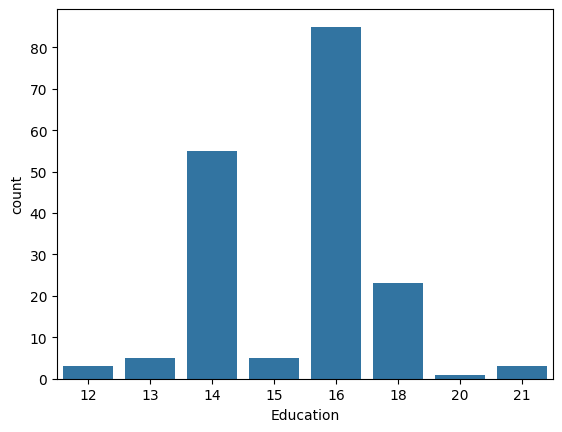

In [14]:
sns.countplot(data=df, x="Education")

<Axes: xlabel='Education'>

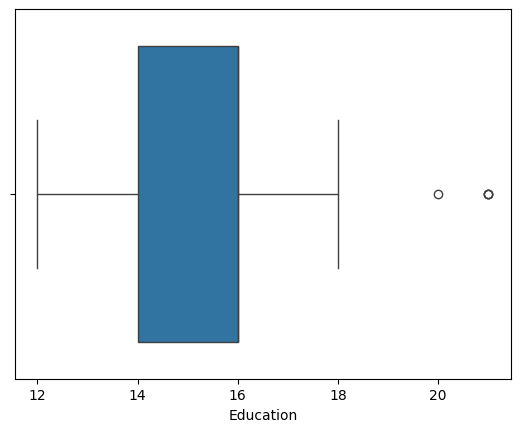

In [15]:
sns.boxplot(data=df, x="Education")

#### Education distribution.

- The above plots show that people with a higher education are more likely to buy a treadmill and we can conclude that it is because people with high educaton have more alligned towards health and fitness.

**From the boxplot we can observe a common fact that the people with high education are more likely to buy a treadmill**

**Outliers**

- There are 2 outliers Present.

### Fitness Analysis.

<Axes: xlabel='Fitness', ylabel='Count'>

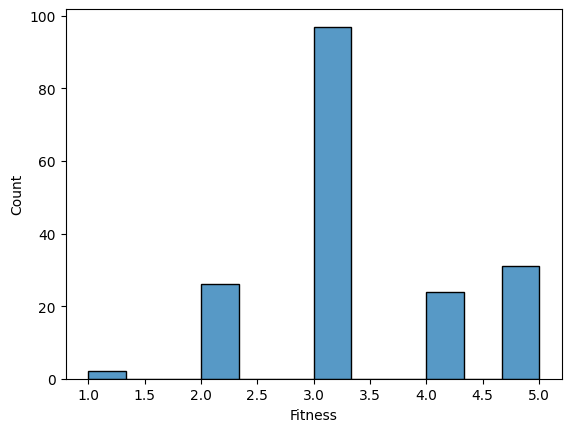

In [16]:
sns.histplot(data=df, x="Fitness")

<Axes: xlabel='Fitness'>

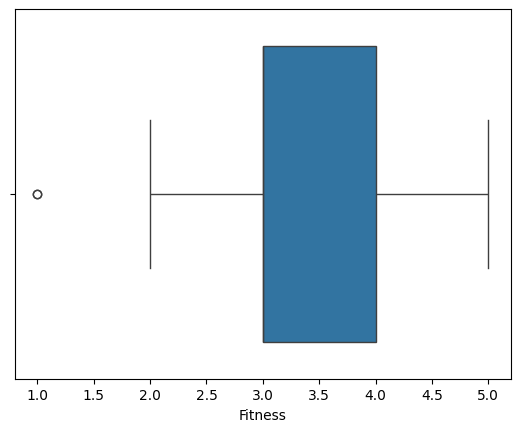

In [17]:
sns.boxplot(data=df, x="Fitness")

#### Fitness distribution.

- The above plot shows that people with very low fitness are very less likely to buy a treadmill.
- People who have median or more than the median fitness are more likely to buy a new treadmill.
- Majority of buyers have a fitness of 3 and above. 

**This concludes that majority of users who buy a treadmill have a fitness of 3 or more**

**Outliers**
- There is only 1 outlier present.

### Usage Analysis

<Axes: xlabel='Usage', ylabel='Count'>

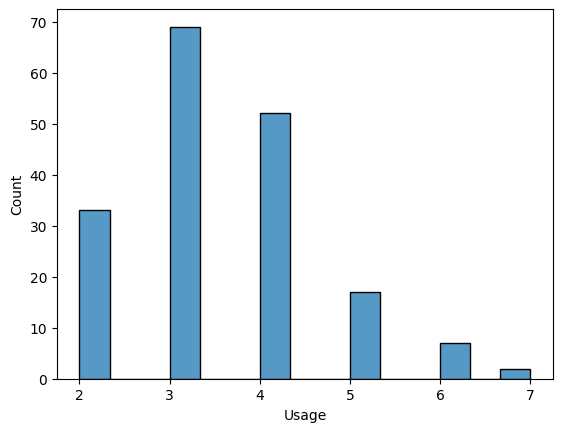

In [18]:
sns.histplot(data=df, x="Usage")

<Axes: xlabel='Usage'>

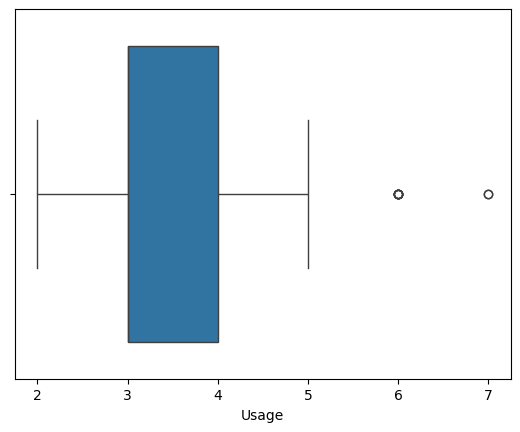

In [19]:
sns.boxplot(data=df, x="Usage")

#### Usage distribution.

- From the above data we can say that majority of users who buy a treadmill use it for 2-4 days in a week.
- Majority of buyers use their treadmills for 3 days in a week.

**This concludes that majority of buyers are beginner or intermediate users who use their treadmill for around 3 days in a week.**

**Outliers**
- There are 5 outliers.

### Miles Analysis

<Axes: xlabel='Miles', ylabel='Count'>

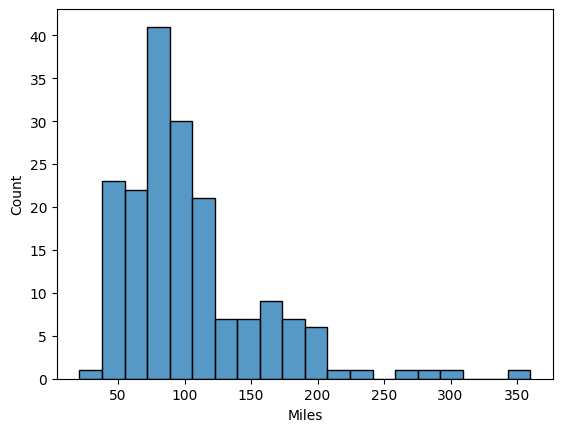

In [20]:
sns.histplot(data=df, x="Miles")

<Axes: xlabel='Miles'>

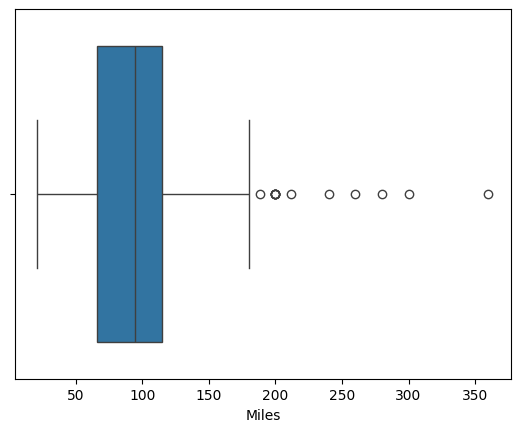

In [21]:
sns.boxplot(data=df, x="Miles")

#### Miles distribution.

- The most common mileage range is between 50 and 110 miles.
- There is a steady decline in the number of treadmill buyers as the number of miles goes up.
- Only a small number of treadmill buyers (fewer than 5) ran more than 250 miles on their treadmills.
- The Presence of many outliers tells us that there are still many people who use their treadmills for more than 200 miles weekly.

**This concludes that majority of treadmill buyers ran their treadmills between 50 and 110 miles**

**Outliers**

- There are 10 outliers.

## Bivariate Analysis.

### Education-Product Analysis

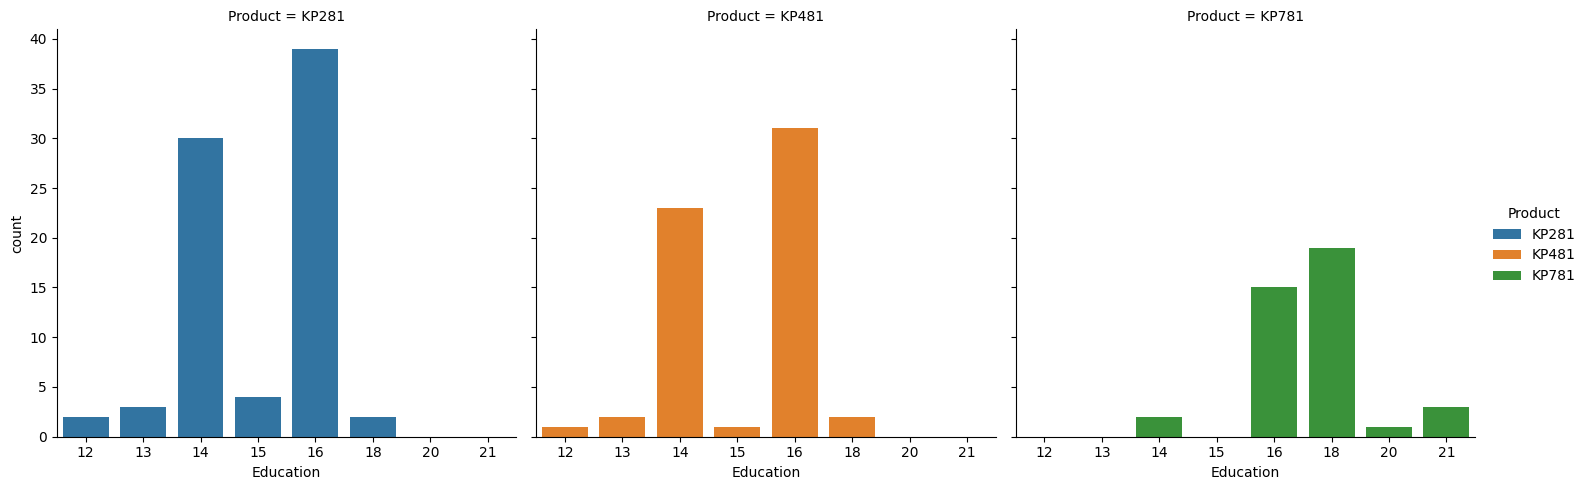

In [68]:
sns.catplot(data=df,x="Education",col="Product",kind="count",hue="Product")

<Axes: xlabel='Education', ylabel='Product'>

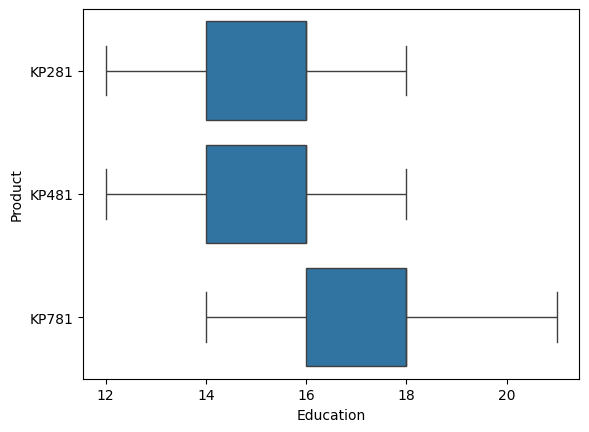

In [71]:
sns.boxplot(data=df,x="Education", y="Product")

#### Education-Product Distribution.

- The above plots shows us that For the KP281 and KP481 product majority of buyers have a high education which is typically around 14 to 16 years.
- For the KP781 product the education level of the users buying it is above 16 years.
- This shows people with a high education are more aligned towards health and fitness.

**This concludes that educated people more prefer fitness products like treadmills and people with a very high level of education,could be due to high income go for the advanced level treadmill which sells for the highest price.**

**Outliers**

- There are no outliers present here.

### Age-Product Analysis.

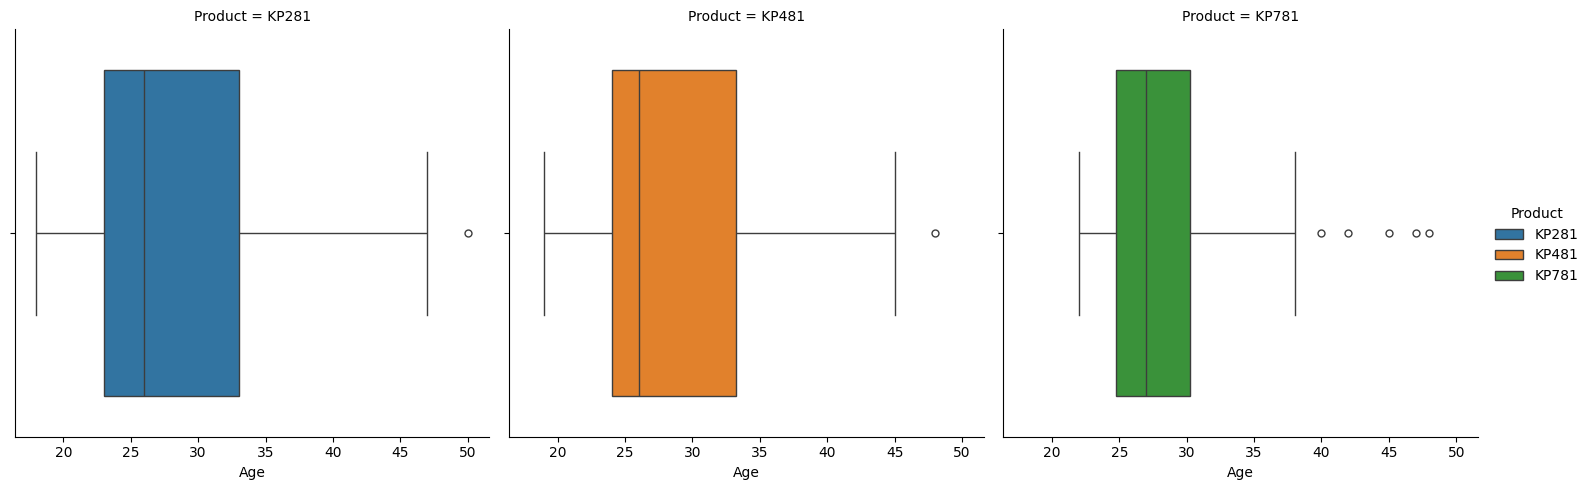

In [92]:
sns.catplot(data=df,x="Age",col="Product",kind="box",hue="Product")

#### Age-Product Distribution.

- The above plot shows that for the KP281, KP481 and KP781 the median age of buyers is around 26-27 years which shows that treadmills are more popular among younger people.
- The max age of KP281 user is 47 years, while for KP481 it's 45 years, and for KP781 it's 37 years. This tells aged people prefer more to buy lower end product maybe due low usage requirements.

**This concludes that majority of people prefer beginner or intermediate level treadmill, for the higher end treadmill there are less people as compared to both of these.**

**Outliers**

- For KP281 there is 1 outlier present.
- For KP481 there is 1 outlier present.
- For KP781 there are 5 outliers present.
    - This shows that there are some people above 40 age who use advance level treadmill.
 

### Income-Product Analysis.

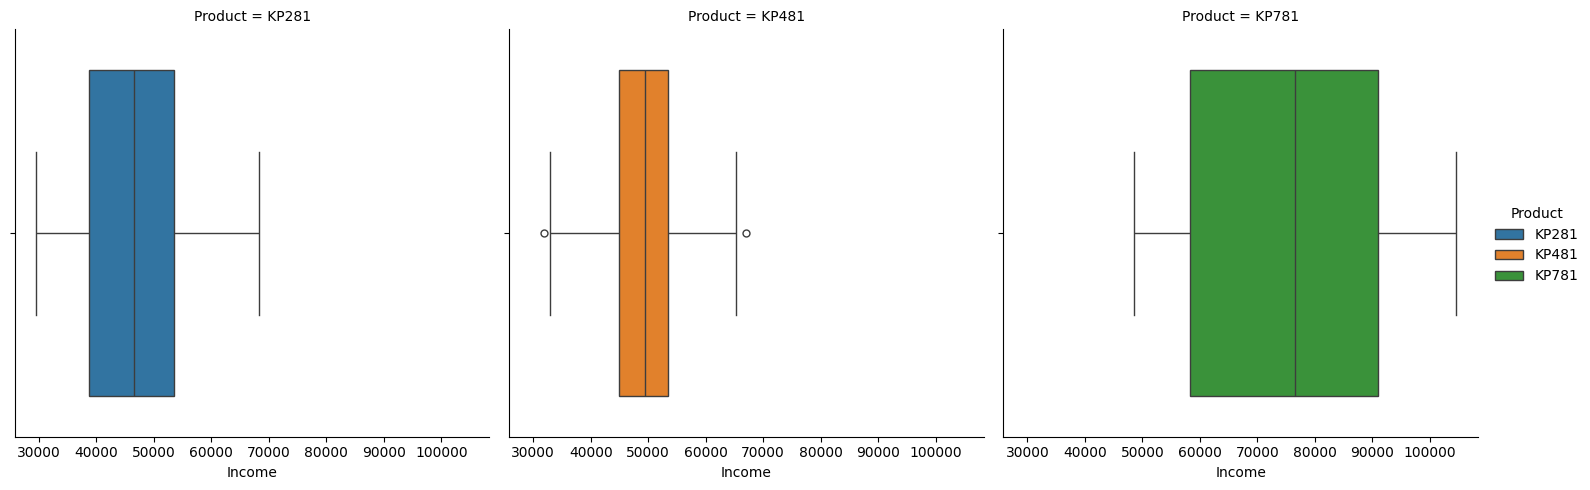

In [96]:
sns.catplot(data=df,x="Income",col="Product",kind="box",hue="Product")

#### Income - Product Distribution.

- For the KP281 Product median income of buyers is around 48,000, For the KP481 it is 50,000, and for KP781 it's 78,000.
- The primary buyers of KP281 and KP481 are low and income group peoples, whereas for KP781 the income of 25th percentile and 75th percentile of people is around 60,000 to 90,000.

**This concludes that the target for KP281 and KP481 should be low income casual and intermediate users whereas for KP781 the target audience consists of high income and more professional users.**

**Outliers**

- There are no outliers present for the KP281 product.
- For KP481 there are 2 outliers present.
- For KP781 there are no outliers present.

### Usage - Product Analysis.

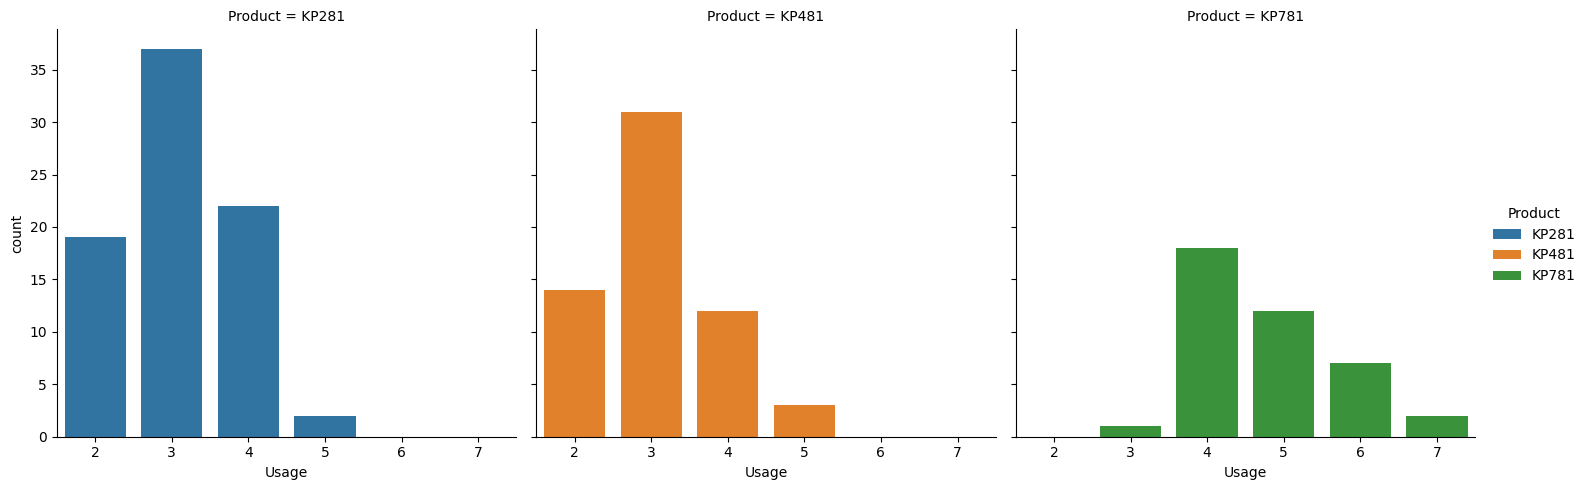

In [97]:
sns.catplot(data=df,x="Usage",col="Product",kind="count",hue="Product")

<Axes: xlabel='Usage', ylabel='Product'>

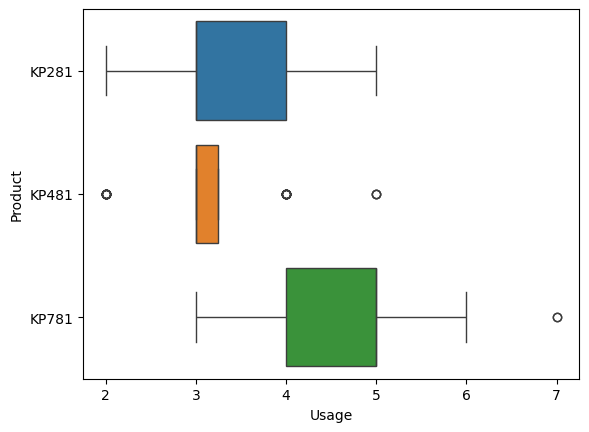

In [100]:
sns.boxplot(data=df,x="Usage", y="Product",hue="Product")

#### Usage - Product Distribution.

- The majority of KP281 buyers use their treadmills for 3 or 4 days in a week.
- The majority of KP481 buyers also use their treadmills for 3 or 4 days in a week.
- The majority of KP781 buyers use their treadmills for 4 or more days in a week.

- We can also observe that the number of KP781's users is significantly lower than KP281 and KP481 users.

**From this we can conclude that although the number of KP781 users are less but still they use it for more number of days in a week than kP281 and KP481's users who use it for around 3 or 4 days in a week**

**Outliers**

- No outliers Present for KP281 Product.
- 8 outliers Present for KP481 Product.
- 1 outlier Present for KP781 Product.

### Fitness - Product Analysis.

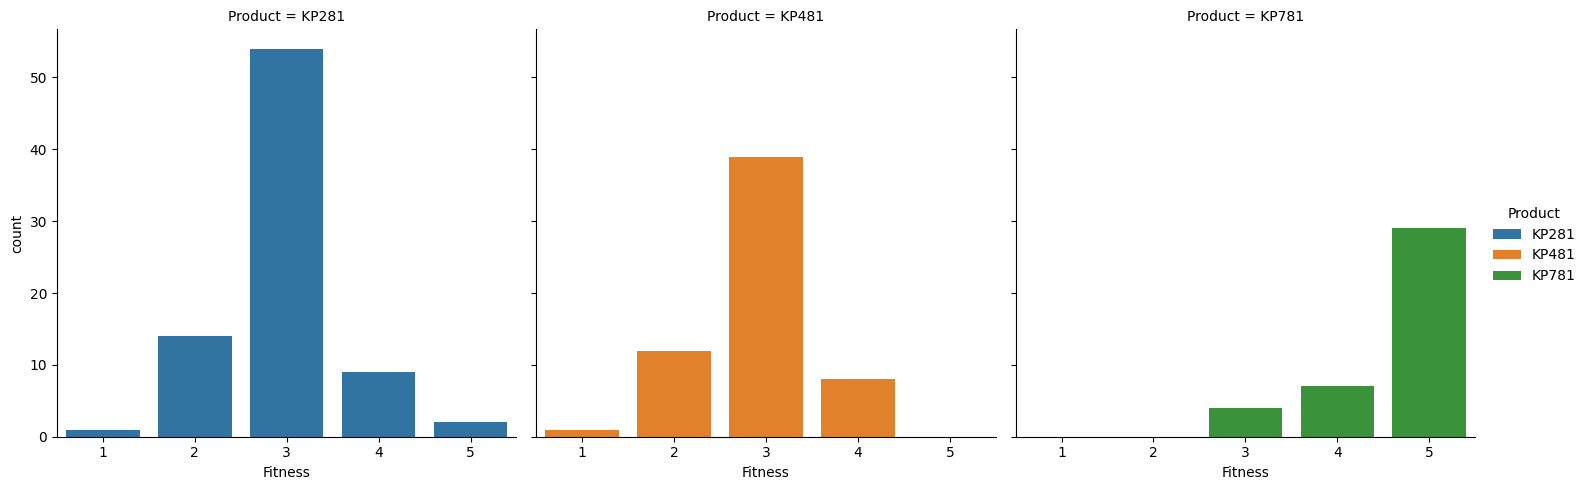

In [101]:
sns.catplot(data=df,x="Fitness",col="Product",kind="count",hue="Product")

#### Fitness - Product Distribution.

- 

### Miles - Product Analysis.

### MaritalStatus - Product Analysis.

### Gender - Product Analysis.

### Gender - Usage Analysis.

### Gender - Fitness Analysis.